In [399]:
import data_structure as ds
from data_structure import Gender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu

In [400]:
df_4o = ds.get_model('4o')
df_35 = ds.get_model('3.5-Turbo')

df_4o['standard_des'] = StandardScaler().fit_transform(df_4o['deserved_salary'].values.reshape(-1, 1))
df_4o['standard_cur'] = StandardScaler().fit_transform(df_4o['current_salary'].values.reshape(-1, 1))

df_35['standard_des'] = StandardScaler().fit_transform(df_35['deserved_salary'].values.reshape(-1, 1))
df_35['standard_cur'] = StandardScaler().fit_transform(df_35['current_salary'].values.reshape(-1, 1))

# df_4o['standard_des'] = df_4o['deserved_salary'].apply(
#     lambda x: (x - df_4o['deserved_salary'].mean()) / df_4o['deserved_salary'].std())

# df_4o['standard_cur'] = df_4o['current_salary'].apply(
#     lambda x: (x - df_4o['current_salary'].mean()) / df_4o['current_salary'].std())

# df_35['standard_des'] = df_35['deserved_salary'].apply(
#     lambda x: (x - df_35['deserved_salary'].mean()) / df_35['deserved_salary'].std())

# df_35['standard_cur'] = df_35['current_salary'].apply(
#     lambda x: (x - df_35['current_salary'].mean()) / df_35['current_salary'].std())

for i, df in enumerate([df_4o, df_35]):
    df['gender_str'] = df['gender'].apply(lambda x: x.name)
    if i == 0:
        df_4o = df[df['gender_str'] != 'Neutral']
    else:
        df_35 = df[df['gender_str'] != 'Neutral']

df_4o['raise_pct'] = (df_4o['deserved_salary'] - df_4o['current_salary']) / df_4o['current_salary']
df_35['raise_pct'] = (df_35['deserved_salary'] - df_35['current_salary']) / df_35['current_salary']

df_4o['raise_actual'] = df_4o['standard_des'] - df_4o['standard_cur']
df_35['raise_actual'] = df_35['standard_des'] - df_35['standard_cur']

C:\Users\pvest\AppData\Local\Temp\ipykernel_18916\199348709.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35['raise_pct'] = (df_35['deserved_salary'] - df_35['current_salary']) / df_35['current_salary']
C:\Users\pvest\AppData\Local\Temp\ipykernel_18916\199348709.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35['raise_actual'] = df_35['standard_des'] - df_35['standard_cur']


In [401]:
male_4o, female_4o = df_4o[df_4o['gender_str'] == 'Male'], df_4o[df_4o['gender_str'] == 'Female']
male_35, female_35 = df_35[df_35['gender_str'] == 'Male'], df_35[df_35['gender_str'] == 'Female']
    

In [402]:
mannwhitneyu(male_4o['raise_pct'], female_4o['raise_pct']), mannwhitneyu(male_35['raise_pct'],female_35['raise_pct'])

(MannwhitneyuResult(statistic=np.float64(108287.5), pvalue=np.float64(0.00037238779512105825)),
 MannwhitneyuResult(statistic=np.float64(114947.5), pvalue=np.float64(0.017482781283138803)))

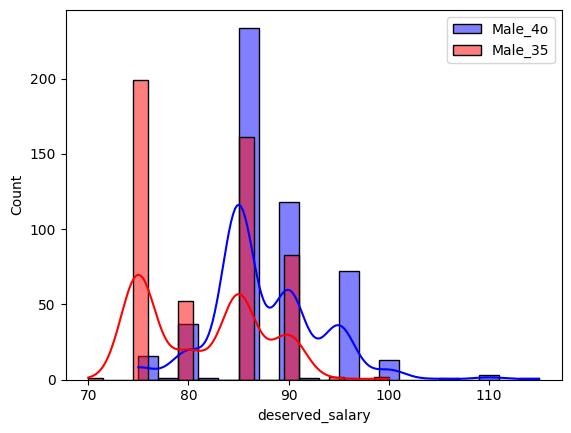

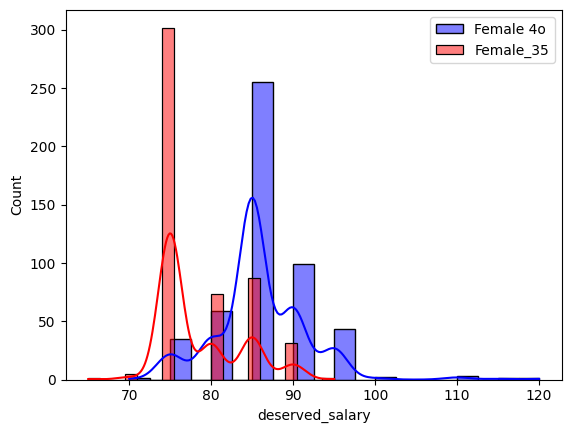

In [403]:
sns.histplot(male_4o['deserved_salary'], bins=20, color='blue', kde=True, label='Male_4o')
sns.histplot(male_35['deserved_salary'], bins=20, color='red', kde=True, label='Male_35')
plt.legend()
plt.show()

sns.histplot(female_4o['deserved_salary'], bins=20, color='blue', kde=True, label='Female 4o')
sns.histplot(female_35['deserved_salary'], bins=20, color='red', kde=True, label='Female_35')
plt.legend()
plt.show()

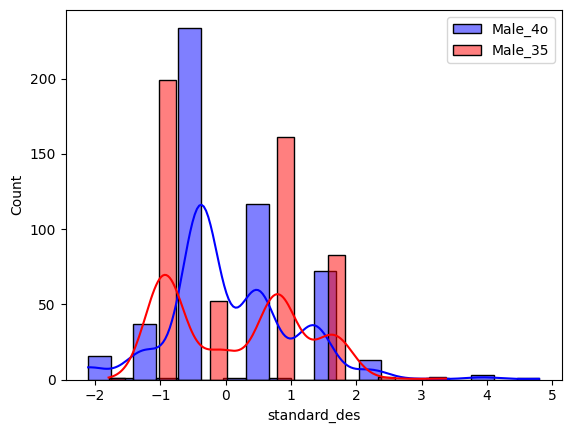

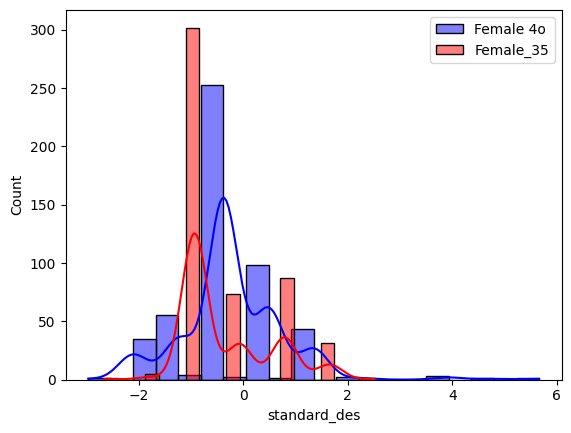

In [404]:
sns.histplot(male_4o['standard_des'], bins=20, color='blue', kde=True, label='Male_4o')
sns.histplot(male_35['standard_des'], bins=20, color='red', kde=True, label='Male_35')
plt.legend()
plt.show()

sns.histplot(female_4o['standard_des'], bins=20, color='blue', kde=True, label='Female 4o')
sns.histplot(female_35['standard_des'], bins=20, color='red', kde=True, label='Female_35')
plt.legend()
plt.show()

In [405]:
from scipy.stats import shapiro

for df in [male_35, female_35, male_4o, female_4o]:
    stat, p = shapiro(df['standard_des'])
    print('Statistics=%.3f, p=%.3e' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.829, p=1.010e-22
Sample does not look Gaussian (reject H0)
Statistics=0.744, p=4.665e-27
Sample does not look Gaussian (reject H0)
Statistics=0.882, p=4.503e-19
Sample does not look Gaussian (reject H0)
Statistics=0.852, p=3.126e-21
Sample does not look Gaussian (reject H0)


In [406]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

mannwhitneyu(
    male_35['standard_des'], female_35['standard_des']
    ),mannwhitneyu(
        male_4o['standard_des'], female_4o['standard_des'])

(MannwhitneyuResult(statistic=np.float64(159634.5), pvalue=np.float64(2.4164453784942184e-16)),
 MannwhitneyuResult(statistic=np.float64(144850.0), pvalue=np.float64(1.203472555453719e-06)))

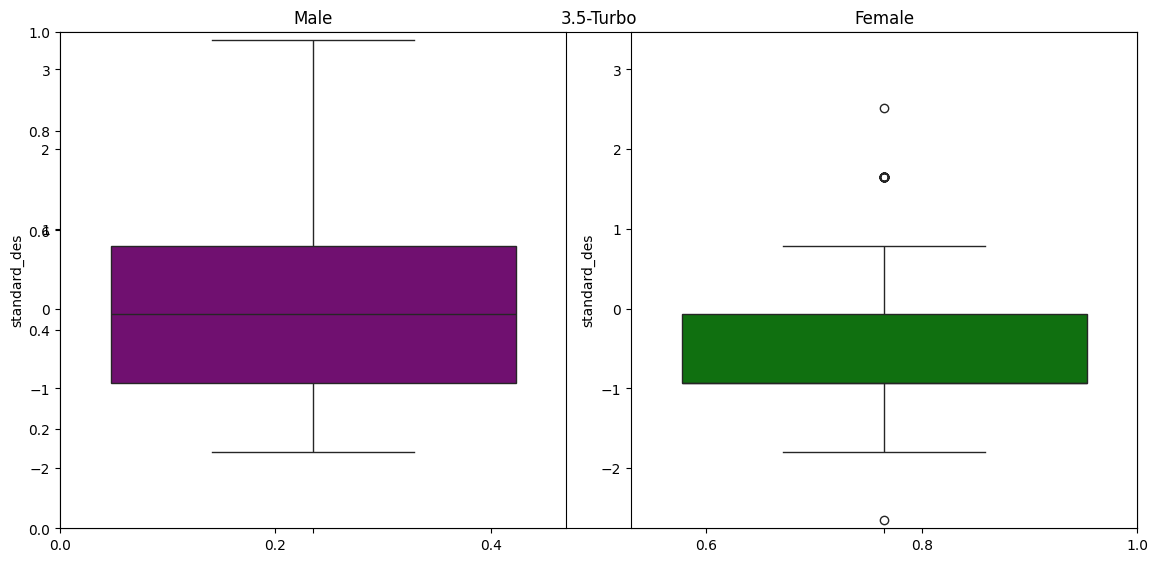

Standard Deviations:
 Male: 1.0236006156629942 Female: 0.8590862295807019
Mean:
 Male: 0.16988996316480445 Female: -0.35183293047305436
Medians:
 Male: -0.07117011970417325 Female: -0.9320989870933792


In [407]:
# Determine the global min and max across both datasets for a consistent scale
global_min = min(male_35['standard_des'].min(), female_35['standard_des'].min())
global_max = max(male_35['standard_des'].max(), female_35['standard_des'].max())

plt.figure(figsize=(12, 6))
plt.title('3.5-Turbo')
# Plot for male
plt.subplot(1, 2, 1)
sns.boxplot(y=male_35['standard_des'], color='purple')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Male')

# Plot for female
plt.subplot(1, 2, 2)
sns.boxplot(y=female_35['standard_des'], color='green')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Female')

plt.tight_layout()
plt.show()

print('Standard Deviations:\n','Male:', np.std(male_35['standard_des']), 
      'Female:',np.std(female_35['standard_des']))
print('Mean:\n','Male:',np.mean(male_35['standard_des']),
      'Female:', np.mean(female_35['standard_des']))
print('Medians:\n','Male:',np.median(male_35['standard_des']), 'Female:',np.median(female_35['standard_des']))

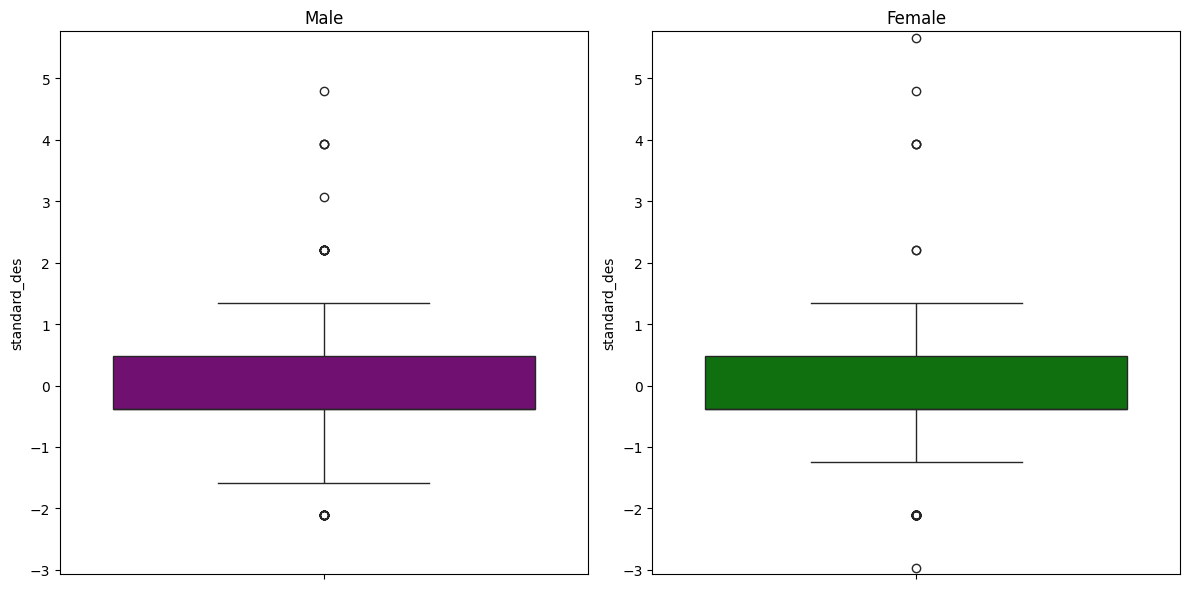

Standard Deviations:
 Male: 0.9654597017529414 Female: 0.9771351642982375
Mean:
 Male: 0.06454178833699525 Female: -0.2241655447946148
Medians:
 Male: -0.3794901275303891 Female: -0.3794901275303891
True


In [408]:
# Determine the global min and max across both datasets for a consistent scale
global_min = min(male_4o['standard_des'].min(), female_4o['standard_des'].min())
global_max = max(male_4o['standard_des'].max(), female_4o['standard_des'].max())

plt.figure(figsize=(12, 6))
# plt.title('4o')
# Plot for male
plt.subplot(1, 2, 1)
sns.boxplot(y=male_4o['standard_des'], color='purple')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Male')

# Plot for female
plt.subplot(1, 2, 2)
sns.boxplot(y=female_4o['standard_des'], color='green')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Female')

plt.tight_layout()
plt.show()

print('Standard Deviations:\n','Male:', np.std(male_4o['standard_des']), 
      'Female:',np.std(female_4o['standard_des']))
print('Mean:\n','Male:',np.mean(male_4o['standard_des']),
      'Female:', np.mean(female_4o['standard_des']))
print('Medians:\n','Male:',np.median(male_4o['standard_des']), 'Female:',np.median(female_4o['standard_des']))
print(np.median(male_4o['standard_des']) == np.median(female_4o['standard_des']))

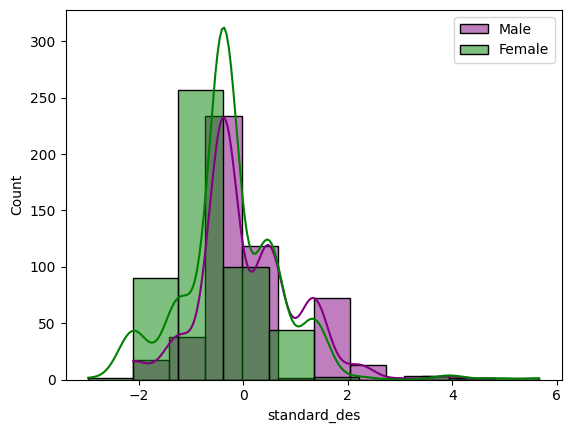

In [409]:
sns.histplot(male_4o['standard_des'], bins=10, color='purple', kde=True, label='Male')
sns.histplot(female_4o['standard_des'], bins=10, color='green', kde=True, label='Female')
plt.legend()
plt.show()

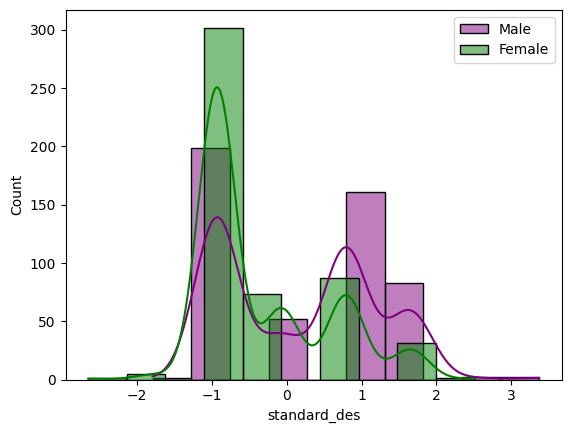

In [410]:
sns.histplot(male_35['standard_des'], bins=10, color='purple', kde=True, label='Male')
sns.histplot(female_35['standard_des'], bins=10, color='green', kde=True, label='Female')
plt.legend()
plt.show()

95% Confidence Interval for the mean Male 4o: [-1.938e-02, 1.512e-01]
-0.01937712409976802 0.15121640235935233 


95% Confidence Interval for the mean Female 4o: [-3.013e-01, -1.401e-01]
-0.3013089344384403 -0.14007752041043156 


95% Confidence Interval for the mean Male 3.5: [8.203e-02, 2.594e-01]
0.08203217224773594 0.25942656537328185 


95% Confidence Interval for the mean Female 3.5: [-4.224e-01, -2.778e-01]
-0.4224290975989693 -0.27775000143421325 




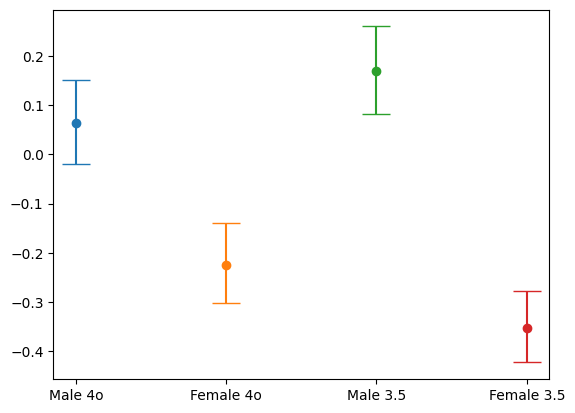

In [411]:
# Function to perform bootstrap resampling and calculate confidence intervals
def bootstrap_confidence_interval(data, n_bootstrap=10000, ci=95):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)
    bootstrap_stat = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_stat, (100-ci)/2)
    upper_bound = np.percentile(bootstrap_stat, 100-(100-ci)/2)
    
    return lower_bound, upper_bound

for data, group in zip([male_4o, female_4o, male_35, female_35],
                ['Male 4o', 'Female 4o',  'Male 3.5', 'Female 3.5']):

    # Calculate the 95% confidence interval for the mean
    ci_lower, ci_upper = bootstrap_confidence_interval(data['standard_des'], n_bootstrap=1_000, ci=95)

    print(f"95% Confidence Interval for the mean {group}: [{ci_lower:.3e}, {ci_upper:.3e}]")
    print(ci_lower, ci_upper, '\n\n')
    plt.errorbar(x=group, y=np.mean(data['standard_des']), yerr=[[np.mean(data['standard_des'])-ci_lower], 
                                                                 [ci_upper-np.mean(data['standard_des'])]], fmt='o',
                                                                 capsize=10)

In [412]:
from scipy.stats import median_test
median_test(male_4o['standard_des'], female_4o['standard_des'])

MedianTestResult(statistic=np.float64(14.305016091783042), pvalue=np.float64(0.00015545009715797205), median=np.float64(-0.3794901275303891), table=array([[209, 151],
       [289, 348]]))

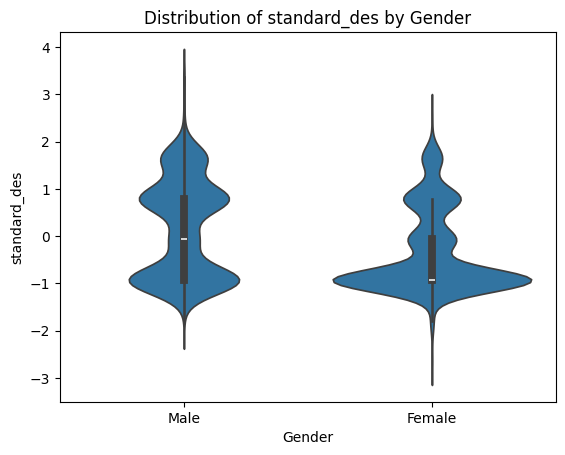

In [413]:
# Assuming male_4o and female_4o are DataFrames and 'standard_des' is a column in each

# Create a DataFrame for male data and add a new column for gender
male_data = male_35[['standard_des']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_35[['standard_des']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
sns.violinplot(x='Gender', y='standard_des', data=combined_data)

plt.title('Distribution of standard_des by Gender')
plt.show()

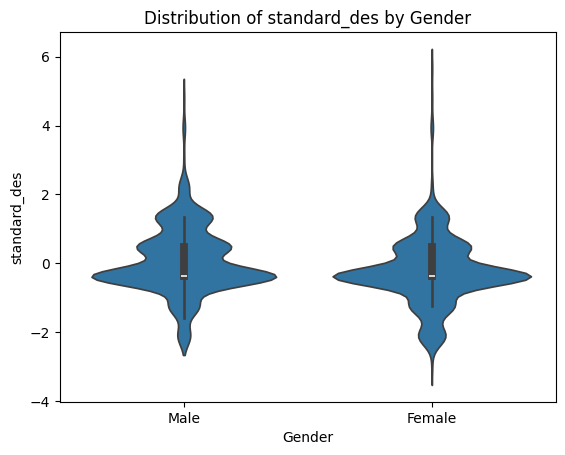

In [414]:
# Assuming male_4o and female_4o are DataFrames and 'standard_des' is a column in each

# Create a DataFrame for male data and add a new column for gender
male_data = male_4o[['standard_des']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_4o[['standard_des']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
sns.violinplot(x='Gender', y='standard_des', data=combined_data)

plt.title('Distribution of standard_des by Gender')
plt.show()

In [415]:
## MEAN PCT RAISES
male_4o['raise_pct'].mean(), female_4o['raise_pct'].mean(), male_35['raise_pct'].mean(), female_35['raise_pct'].mean()

(np.float64(0.31165326027665374),
 np.float64(0.3263452340424113),
 np.float64(0.2475816267066267),
 np.float64(0.2512356060606061))

In [416]:
male_4o['raise_pct'].median(), female_4o['raise_pct'].median(), male_35['raise_pct'].median(), female_35['raise_pct'].median()

(np.float64(0.3076923076923077),
 np.float64(0.3076923076923077),
 np.float64(0.25),
 np.float64(0.25))

In [417]:
mannwhitneyu(male_4o['raise_pct'], female_4o['raise_pct']), mannwhitneyu(male_35['raise_pct'],female_35['raise_pct'])

(MannwhitneyuResult(statistic=np.float64(108287.5), pvalue=np.float64(0.00037238779512105825)),
 MannwhitneyuResult(statistic=np.float64(114947.5), pvalue=np.float64(0.017482781283138803)))

In [418]:
mannwhitneyu(male_4o['raise_actual'], female_4o['raise_actual']), mannwhitneyu(male_35['raise_actual'],female_35['raise_actual'])

(MannwhitneyuResult(statistic=np.float64(110009.0), pvalue=np.float64(0.0014991189910192034)),
 MannwhitneyuResult(statistic=np.float64(115343.5), pvalue=np.float64(0.022562247621925005)))

In [419]:
male_4o['raise_actual'].mean(), female_4o['raise_actual'].mean(), male_35['raise_actual'].mean(), female_35['raise_actual'].mean()

(np.float64(-0.026252337732442774),
 np.float64(0.041787034414036826),
 np.float64(-0.0032492356337286967),
 np.float64(-0.007537042785892322))

In [420]:
male_4o['raise_actual'].median(), female_4o['raise_actual'].median(), male_35['raise_actual'].median(), female_35['raise_actual'].median()

(np.float64(-0.1249841418412454),
 np.float64(-0.1249841418412454),
 np.float64(-0.05649044355117383),
 np.float64(-0.05649044355117383))

In [421]:
mannwhitneyu(male_35['standard_cur'], female_35['standard_cur'])

MannwhitneyuResult(statistic=np.float64(158744.0), pvalue=np.float64(6.721329623336588e-17))

In [422]:
female_35['standard_cur'].mean(), female_35['standard_cur'].median()

(np.float64(-0.3442958876871621), np.float64(-0.8756085435422054))

In [423]:
df_4o

,name,gender,current_salary,deserved_salary,round_,standard_des,standard_cur,gender_str,raise_pct,raise_actual
0,James,Gender.Male,60.0,90.0,5,0.483616,-1.140064,Male,0.500000,1.623681
0,James,Gender.Male,55.0,75.0,5,-2.105703,-2.025622,Male,0.363636,-0.080081
0,James,Gender.Male,70.0,90.0,5,0.483616,0.631052,Male,0.285714,-0.147436
0,James,Gender.Male,55.0,85.0,5,-0.379490,-2.025622,Male,0.545455,1.646132
0,James,Gender.Male,65.0,85.0,5,-0.379490,-0.254506,Male,0.307692,-0.124984
...,...,...,...,...,...,...,...,...,...,...
0,Sarah,Gender.Female,70.0,95.0,5,1.346723,0.631052,Female,0.357143,0.715671
0,Sarah,Gender.Female,60.0,85.0,5,-0.379490,-1.140064,Female,0.416667,0.760574
0,Sarah,Gender.Female,70.0,90.0,5,0.483616,0.631052,Female,0.285714,-0.147436
0,Sarah,Gender.Female,72.0,90.0,5,0.483616,0.985275,Female,0.250000,-0.501659


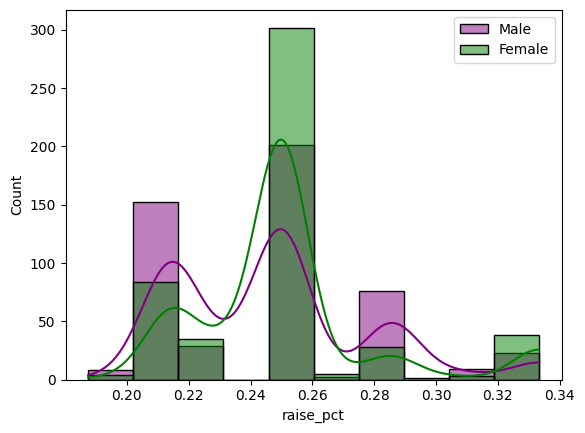

In [425]:
sns.histplot(male_35['raise_pct'], bins=10, color='purple', kde=True, label='Male')
sns.histplot(female_35['raise_pct'], bins=10, color='green', kde=True, label='Female')
plt.legend()